# Classifier Practice

In [40]:
# Settings
NPROPERTY = 2

## Implementation of Binary Classifier
- Problem: Given the organized data with n-properties into two different categories. Create a classifier model with n-properties as an input.
    - Input: N-properties
    - Output: binary (2-type)
    
### Model
- For simplicity, lets model the simplest linear classifier $f(x_1, x_2, \dots)=w_0 + w_1x_1 + w_2x_2 + \dots=0$. 
- Note, the value of $f$ represent the distance from the boundary line.
- Instead of strictly determining the type of the data with this linear function, lets assume the distance from the line is proportional to the percentage of the data belong to the category.
- By using sigmoid function, it is possible to represent the distance as the probability. 
$$
f(x_1, x_2, \dots) = w_0+w_1x_1+w_2x_2+\dots \\
f(x_1, x_2, \dots) = (1, x_1, x_2, \dots) \cdot 
\begin{pmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots
\end{pmatrix}\\
f = w_0 + \textbf{Xw}\\
P(x_1, x_2, \dots) = \sigma(f(x_1,x_2)) \\
$$
- The function $P$ represent the probability that the point $(x_1,x_2, \dots)$ is type-1. By same logic, the probability that this point is type-0 is $1-P$.

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [99]:
# Build Layers
model = Sequential()
model.add(Dense(1, input_dim = NPROPERTY,
                    activation='sigmoid',
                    kernel_initializer='random_uniform',
                    bias_initializer='random_uniform'))

## Setting Optimizer for Training
### Gradient Descent Method
One of the key criteria of local minimum of function is the gradient $\frac{\partial E}{\partial w_m} = 0$.  
The gradient of function represent the direction where the maximum slope along the surface is.  
Gradient descent method suggest the discrete approach to local minima by moving in the opposite gradient direction from any point along the surface.  
$$
\textbf{w}^{\text{new}}=\textbf{w}-\epsilon\nabla E
$$
- $\epsilon$ represent the rate of learning

### Error Function
- In order to calculate the error with given data, we need to consider the probability of guessing the result correctly. By maximizing this value, we can move the point $\vec{w}$ to the best value.
- Given nth data $(x_{n_1}, x_{n_2}, \dots, t_n)$:
$$
\text{Probability of guessing correct answer : }
P_n=
\begin{cases}
P,& t_n=1\\
1-P,& t_n=0
\end{cases}\\
\begin{aligned}
E &= -\log \prod_{n=1}^{N}P_n \\
&=  -\log \prod_{n=1}^{N} P(x_1,x_2) \left(1-P(x_1,x_2) \right)^{(1-t_n)}\\
&= -\sum_{n=1}^{N} \left[ t_n \log P(x_1,x_2) + (1-t_n)\log (1-P(x_1,x_2))\right]
\end{aligned}
$$
- Note, the negative is to reverse the maximizing problem to minimizing problem, and logarithm is due to the floating point error.

In [100]:
# Build Compiler
model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Prepare Data

In [101]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [102]:
# Example Data Creation
np.random.seed(20121283)

n0, mu0, variance0 = 30, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t'] = 0

n1, mu1, variance1 = 40, [16, 19], 17
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

# Extract data separately for t=0 and t=1
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

In [103]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
x1,12.595063,15.542943,8.258262,20.981374,6.053343,23.706379,21.424257,9.931085,12.110654,15.104998,...,12.864251,15.368529,15.205629,10.947875,14.088058,19.490715,8.080096,10.451796,21.325461,9.759405
x2,8.243820,0.689499,14.120903,15.867654,17.489436,23.327626,20.504934,12.160047,21.429381,19.158264,...,-4.160881,19.774432,21.544779,6.292905,17.141737,13.944367,7.417540,12.680346,4.903620,20.653293
t,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


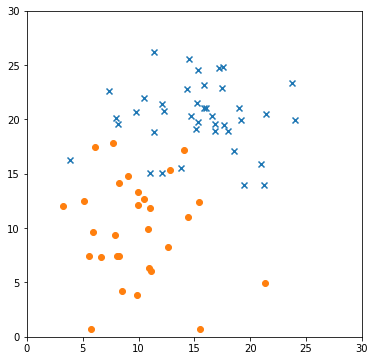

In [104]:
# Plot each data - use x or o depend on the value of t
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

train_set.T

## Training

In [105]:
model.fit(train_x, train_t, epochs=5000, verbose=0)

In [106]:
model.get_weights()

[array([[0.12115106],
        [0.36255255]], dtype=float32), array([-6.7327747], dtype=float32)]

In [112]:
ws = model.get_weights()
w0_val = ws[1][0]
w1_val, w2_val = ws[0][0][0], ws[0][1][0]
print(w0_val, w1_val, w2_val)

-6.7327747 0.12115106 0.36255255


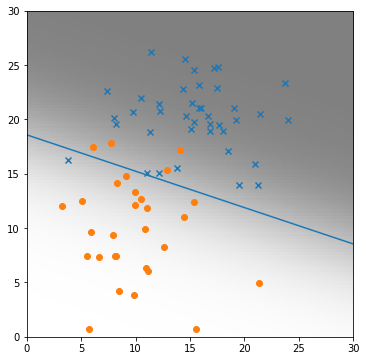

In [113]:
# Plot each data - use x or o depend on the value of t
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

# Draw result
linex = np.linspace(0,30,10)
liney = - (w1_val*linex/w2_val + w0_val/w2_val)
subplot.plot(linex, liney)

# Draw Gradation
field = [[(1 / (1 + np.exp(-(w0_val + w1_val*x1 + w2_val*x2))))
          for x1 in np.linspace(0,30,100)]
         for x2 in np.linspace(0,30,100)]
subplot.imshow(field, origin='lower', extent=(0,30,0,30),
               cmap=plt.cm.gray_r, alpha=0.5)